<a href="https://colab.research.google.com/github/frankausberlin/notebook-collection/blob/main/backpropagationnotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table><tr><td width=800 align=center>

# <font size='+3'/><b>Backpropagation of error

</b>is an algorithm that implements the<br><br>
<font size='+3'/><b>extended delta rule
</td></tr></table>

<br>
<table width=800>
<tr></tr>
<tr><td align=center>


<table><tr></tr><tr><td align=center width=100>
<font size='+2'/>Terms</td><td><table>
<tr><td><p>$w$; $b$</td><td><p>weights; bias</td><td><p>$\}$ model parameter</td><td></td></tr>
<tr><td><p>$x$ or $s$</td><td><p>signals, inputs</td><td><p>$\}$ features, independent variables</td></tr>
<tr><td><p>$y$ or $t$</td><td><p>actual, expected, target</td><td width=50 rowspan=2><p>$\Huge \}$ labels, dependent variables</td></tr>
<tr><td><p>$\hat y$</td><td><p>forecast, predicted</td></tr>
</table> </td></tr></table>

</td></tr>
</table>
<br>


<table width=800>
<tr></tr>
<tr><td align=center>

<table>
<tr><td colspan=5 align=center><font size='+1'/>History</td></tr>
<tr></tr>
<tr><td><b>1949</td><td><b>1957</td><td><b>1960</td><td><b>1969</td><td><b>1986</td></tr>
<tr><td><br>Hebb-rule<br><br>Donald O. Hebb</td><td><br>Perceptron-rule<br><br>Frank Rosenblat</td><td><br>Delta-rule (single layer)<br><br>Widrow & Hoff</td><td><br>Bashing Delta-rule<br><br>Minsky & Papert</td><td><br>Backpropagation (multi layer)<br><br>McClelland & Rumelhart</td></tr>
</table>

</td></tr>
</table>

<br>

* This notebook contains schematic drawings for a better understanding of the extended delta rule formula.
* The tabular rollout of the formula into input, hidden and output layers serves as the basis for the impementation.
* The formula is examplary implemented in **numpy**, as well as the following versions based on it.
* In three refactoring steps the examplary implementation evolves to an object oriented implementation of a simple neural network.
* Finally, to play with it, there is the implementation of a simple model for the **mnist** digit dataset with the developed classes.

<table>
<tr><td colspan=3 align='center'>

##<font size='+3' color='purple'><b>Extended delta rule formula</td></tr><tr><td colspan=3 allign='center'>

perceptron_simple.svg
</td></tr><tr></tr><tr><td width=150>

$$\large net = x \bullet w + b$$<br>
$$\large \hat y = \varphi (net)$$<br>
$$\large loss = \mathcal L (y, \hat y)$$
</td><td width=400>

$$\quad \quad \quad \left| \begin{array}{ll}
\qquad net = \text{transfered net input}\\
\qquad x = \text{input signals / stimulation}\\
\qquad w, b = \text{parameter: weights, bias}\\ 
\qquad \varphi , \varphi ' = \text {activation function, derivative}\\
\qquad \mathcal L, \mathcal L ' = \text {error function, derivative}\\
\end{array}\right.$$
</td><td width=250>

$$\quad \left| \begin{array}{ll}
\qquad y = \text {expected output}\\
\qquad \hat y = \text{predicted output}\\
\qquad \eta = \text{learningrate eta}\\
\qquad \Delta = \text {change value}\\
\qquad \small{\left[w_{jk}^{new} = w_{jk}^{old}+\Delta_{kj}\right]}\\
\end{array}\right.$$
</td></tr><tr><td colspan=3 align=center >

<table>
<tr><td width=400>
<p>$$\color{purple}{\Huge\Delta_{ji} = -\eta \;\; \delta_j \;\; \hat y_i \qquad}$$
</td><td width=600>
<p>$\left| 
\color{purple}{\begin{array}{ll}
\huge \qquad \delta_j = \large \begin{cases}
\varphi\,'(net_j)\cdot \mathcal L\,' (y, \hat y) &\color{black}{: \small \text{output layer}}\\
\varphi\,'(net_j)\cdot \sum_k{\delta_k w_{kj}} &\color{black}{: \small \text{hidden layer}}
\end{cases}\\
\qquad  \rule{12cm}{0.4pt}\\
\Large \qquad \color{purple}{\Delta_j ^b = - \eta \delta_j b_j} \color{black}{\small \qquad \text{for bias}}
\end{array}}
\right.$<br></td></tr>
<tr></tr>
<tr><td></td><td>
$\quad$<b>Note</b>: $\hat y_i$ is the output from previous layer. You can write equivalent $out_i$ or $inp_j$ or $s_i$.</td></tr>
</table>
</td></tr>
</table>

----

**roll out formula**<br>

<table>
<tr><td align='center'>input layer<br><br>$$\huge i$$</td><td colspan=2 align='center' width=350>hidden layer<br><br>$$\huge j$$</td><td colspan=2 align='center' width=350>output layer<br><br>$$\huge k$$</td><td align='center'><font size='+2' color='purple'><b>training</td></tr>

<tr><td>signals</td><td>stimulus</td><td align='center' width=350>activation</td><td>stimulus</td><td align='center' width=350>activation</td><td align='center' width=200>loss</td></tr>

<tr><td>$\huge s_1$ <br><br><br><br><br><br><br><br></td><td>$s_1 w_{11}$+<br>$s_2 w_{12}$+<br>...<br>$s_i w_{1i}$<br><br><br><br><br><br><br><br></td><td>-->$\;\huge net_1 |\;\;\;\varphi_h (net_1)$  -->  $\huge s_1$<br><br>$\rule{7cm}{0.4pt}$<br><font size='-1' color='purple'><b>backward<br>$\color{purple}{\Large \delta_1 = \varphi_h'(net_1)\cdot \sum_k {\delta_k w_{k1}}}$<br>$\color{purple}{\Large\Delta_{1i} = -\eta \delta_1 s_i}$</td><td>$s_1 w_{11}$+<br>$s_2 w_{12}$+<br>...<br>$s_j w_{1j}$<br><br><br><br><br><br><br><br></td><td>-->$\;\huge net_1|\;\;\;\varphi_o (net_1)$  -->  $\huge y_1$<br><br>$\rule{7cm}{0.4pt}$<br><font size='-1' color='purple'><b>backward<br>$\color{purple}{\Large \delta_1 = \varphi_o'(net_1)\cdot \mathcal L'(t_1,y_1)}$<br>$\color{purple}{\Large \Delta_{1j} = -\eta \delta_1 s_j}$</td><td align='center'>$\Large \mathcal L (t_1, y_1)$  -->  $\huge e_1$</td></tr>

<tr><td>$\huge s_2$ <br><br><br><br><br><br><br><br></td><td>$s_2 w_{21}$+<br>$s_2 w_{22}$+<br>...<br>$s_i w_{2i}$<br><br><br><br><br><br><br><br></td><td>-->$\;\huge net_2|\;\;\;\varphi_h (net_2)$  -->  $\huge s_2$<br><br>$\rule{7cm}{0.4pt}$<br><font size='-1' color='purple'><b>backward<br>$\color{purple}{\Large \delta_2 = \varphi_h'(net_2)\cdot \sum_k {\delta_k w_{k2}}}$<br>$\color{purple}{\Large\Delta_{2i} = -\eta \delta_2 s_i}$</td><td>$s_2 w_{21}$+<br>$s_2 w_{22}$+<br>...<br>$s_j w_{2j}$<br><br><br><br><br><br><br><br></td><td>-->$\;\huge net_2|\;\;\;\varphi_o (net_2)$  -->  $\huge y_2$<br><br>$\rule{7cm}{0.4pt}$<br><font size='-1' color='purple'><b>backward<br>$\color{purple}{\Large \delta_2 = \varphi_o'(net_2)\cdot \mathcal L'(t_2,y_2)}$<br>$\color{purple}{\Large \Delta_{2j} = -\eta \delta_2 s_j}$</td><td align='center'>$\Large \mathcal L (t_2, y_2)$  -->  $\huge e_2$</td></tr>

<tr><td>$...$<br><br>$\huge s_i$ <br><br><br><br><br><br><br><br></td><td>$s_1 w_{j1}$+<br>$s_2 w_{j2}$+<br>...<br>$s_i w_{ji}$<br><br><br><br><br><br><br><br></td><td>-->$\;\huge net_j|\;\;\;\varphi_h (net_j)$  -->  $\huge s_j$<br><br>$\rule{7cm}{0.4pt}$<br><font size='-1' color='purple'><b>backward<br>$\color{purple}{\Large \delta_j = \varphi_h'(net_j)\cdot \sum_k {\delta_k w_{kj}}}$<br>$\color{purple}{\Large\Delta_{ji} = -\eta \delta_j s_i}$</td><td>$s_1 w_{k1}$+<br>$s_2 w_{k2}$+<br>...<br>$s_j w_{kj}$<br><br><br><br><br><br><br><br></td><td>-->$\;\huge net_k|\;\;\;\varphi_o (net_k)$  -->  $\huge y_k$<br><br>$\rule{7cm}{0.4pt}$<br><font size='-1' color='purple'><b>backward<br>$\color{purple}{\Large \delta_k = \varphi_o'(net_k)\cdot \mathcal L'(t_k, y_k)}$<br>$\color{purple}{\Large \Delta_{kj} = -\eta \delta_k s_j}$</td><td align='center'>$\Large \mathcal L (t_k, y_k)$  -->  $\huge e_k$</td></tr>
<tr><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td></tr>
</table>



## Exemplary implementation



In [ ]:
#@title numpy simple: version 1 { form-width: "300px" }
#@markdown * Hard coded multi layer perceptron in 100% numpy.
#@markdown * Three perceptrons in hidden and two in output layer.
#@markdown * The perceptrons in hidden layer expect five input signals.
#@markdown * The model is initialized and a prediction is made with it.
#@markdown * The target is used to calculate an error.
#@markdown * The delta values and change values are calculated by the delta rule.
#@markdown * After the optimization the new prediction has a better loss value.
from numpy            import array, sum, mean, exp
from numpy.random     import randn, seed 
seed                  (42)

act_h    = sigmoid = lambda x: 1 / (1 + exp(-x))               # activation hidden layer: sigmoid
act_o    = sigmoid                                             # activation output layer: sigmoid
act_h_   = lambda x: sigmoid(x) * (1 - sigmoid(x))             # derivation activation hidden
act_o_   = lambda x: sigmoid(x) * (1 - sigmoid(x))             # derivation activation output
loss     = lambda t, y: mean (1/2 * (t-y)**2)                  # error function: mse (mean squared error)
loss_    = lambda t, y: y - t                                  # derivation error function

inp      = array ( [0.1, 0.2, 0.3, 0.4, 0.5] )                 # x : 5 input signals
tar      = array ( [1.0, 0.0] )                                # y : 2 expected outputs
eta      = 0.5                                                 # learning rate

wei_h    = randn (3,5)                                         #                         #
bia_h    = randn (3)                                           # hidden layer            #
net_h    = wei_h.dot (inp) + bia_h                             # with 3 perceptrons      #
out_h    = act_h (net_h)                                       #                         # forward:
                                                                                         # hidden -> output
wei_o    = randn (2,3)                                         #                         #
bia_o    = randn (2)                                           # output layer            #
net_o    = wei_o.dot (out_h) + bia_o                           # with 2 perceptrons      #
out_o    = act_o (net_o)                                       #                         #

error    = loss (tar, out_o)                                   # calculate error         # backward: output -> hidden        
#####################################################################################################################
del_o    = act_o_ (net_o) * loss_ (tar, out_o)                 # del_o -> del_h -> cha_                             #
K        = range (wei_o.shape[0])                              # range for all perceptrons in output layer          #
del_h    = act_h_ (net_h) *\
               array ([ sum([del_o[k]*wei_o[k][0] for k in K]) ,          # sum_k(d_k * w_kj) |                     #
                        sum([del_o[k]*wei_o[k][1] for k in K]) ,          # sum_k(d_k * w_kj) | for all in hidden   #  
                        sum([del_o[k]*wei_o[k][2] for k in K])  ])        # sum_k(d_k * w_kj) | layer               #
                                                                                                                    #
cha_hw   = array ( [-eta * del_h[0] * inp,      -eta * del_h[1] * inp,      -eta * del_h[2] * inp       ] )         #
cha_hb   = array ( [-eta * del_h[0] * bia_h[0], -eta * del_h[1] * bia_h[1], -eta * del_h[2] * bia_h[2]] )           #
cha_ow   = array ( [-eta * del_o[0] * out_h,    -eta * del_o[1] * out_h] )                                          #
cha_ob   = array ( [-eta * del_o[0] * bia_o[0], -eta * del_o[1] * bia_o[1]] )                                       #
############################ BACKPROPAGATION OF ERROR IMPLEMENTS THE EXTENDED DELTA-RULE ############################
wei_h    += cha_hw                                             #
bia_h    += cha_hb                                             # update weights
wei_o    += cha_ow                                             # and bias
bia_o    += cha_ob                                             #

# check
err_new  = loss (tar, act_o ( wei_o.dot ( act_h ( wei_h.dot (inp) + bia_h ) ) + bia_o ) )
err_new  < error, error.round(4), err_new.round(4)


(True, 0.2014, 0.1995)

In [9]:
#@title    refactoring: version 2 - batches { form-width: "300px" }
#@markdown * nrH, nrO: perceptron count for hidden and output layer
#@markdown * eta, bs: adding learning rate and batch size
#@markdown * inp, tar: inputs and targets as batch
#@markdown * @: replace '.dot' with '@'
#@markdown * computation: delta h in 2 loops and change values for weights with broadcast
#@markdown * stochastic step: needed for the batch mechanism 
from numpy            import array, sum, mean, exp
from numpy.random     import randn, seed 
seed                  (42)

act_h    = sigmoid = lambda x: 1 / (1 + exp(-x))               # activation hidden layer: sigmoid
act_o    = sigmoid                                             # activation output layer: sigmoid
act_h_   = lambda x: sigmoid(x) * (1 - sigmoid(x))             # derivation activation hidden
act_o_   = lambda x: sigmoid(x) * (1 - sigmoid(x))             # derivation activation output
loss     = lambda t, y: mean (1/2*(t-y)**2)                    # error function: mse (mean squared error)
loss_    = lambda t, y: y - t                                  # derivation error function

nrH, nrO = 3, 2                                                # nr hiddens / outputs perceptrons
eta, bs  = 0.5, 1                                              # learning rate, batch size

inp      = array([0.1, 0.2, 0.3, 0.4, 0.5]*bs).reshape (-1,5)  # x : 5 input signals     # mini batch
tar      = array([1.0, 0.0]*bs).reshape (-1,2)                 # y : 2 expected outputs  # with bs entries

wei_h    = randn (nrH, inp.shape[-1])                          #                         #
bia_h    = randn (nrH)                                         # hidden layer            #
net_h    = inp @ wei_h.T + bia_h                               # with 3 perceptrons      #
out_h    = act_h (net_h)                                       #                         # 
                                                                                         # forward: hidden -> output
wei_o    = randn (nrO, out_h.shape[-1])                        #                         #
bia_o    = randn (nrO)                                         # output layer            #
net_o    = out_h @ wei_o.T + bia_o                             # with 2 perceptrons      #
out_o    = act_o (net_o)                                       #                         #

error    = loss (tar, out_o)                                   # calculate error         # backward: output -> hidden        
#####################################################################################################################
del_o    = act_o_ (net_o) * loss_ (tar, out_o)                 # del_o -> del_h -> cha_                             #
J, K     = range (wei_h.shape[0]), range (wei_o.shape[0])      # range for all perceptrons in hidden, output layer  #
del_h    = act_h_ (net_h) *\
           array ([ sum([del_o[:,k]*wei_o[k][j] for k in K]) for j in J])  # sum_k(d_k * w_kj) for every j          #
                                                                           # [:,k] - extra dim of cause batch dim   #
cha_ow   = -eta * out_h * del_o[None,:].T                      #                                                    #                                                    #
cha_ob   = -eta * bia_o * del_o                                # change values via delta-rule                       #                                    #
cha_hw   = -eta * inp   * del_h[None,:].T                      # [None,:] - extra dim of cause batch dim            #
cha_hb   = -eta * bia_h * del_h                                #                                                    #
############################ BACKPROPAGATION OF ERROR IMPLEMENTS THE EXTENDED DELTA-RULE ############################
cha_hw, cha_ow = sum (cha_hw, axis=1), sum (cha_ow, axis=1)    # stochastic step: sum up
cha_hb, cha_ob = sum (cha_hb, axis=0), sum (cha_ob, axis=0)    # change values for mini batch
wei_h += cha_hw                                                #
bia_h += cha_hb                                                # update weights
wei_o += cha_ow                                                # and bias
bia_o += cha_ob                                                #

# check
err_new  = loss (tar, act_o (act_h (inp @ wei_h.T + bia_h) @ wei_o.T + bia_o)) 
err_new < error, error.round(4), err_new.round(4)


(True, 0.2014, 0.1995)

In [5]:
#@title refactoring: version 3 - classes { form-width: "300px" }
#@markdown * Design of the classes **```Perceptrons```** and **```Model_V3```**
#@markdown * The functionality of version 2 is divided between the two classes.
#@markdown * Computation delta for hidden through broadcast.
#@markdown * The handling of **multiple layers** is added.
#@markdown 
#@markdown **Use cases**<br>
#@markdown _Creation_: create a new model with multiple layers in one line.<br>
#@markdown _Prediction_: use the model to predict a batch of input data.<br>
#@markdown _Optimization_: offers a method to improve predictions.<br>

from numpy            import array, sum, mean, exp, arange, maximum, ones
from numpy.random     import randn, seed 
seed                  (42)

class Perceptrons:
  """ Represents a layer of perceptrons

    * Generates a callable object that implements the stimmulation and 
      activation of the perceptrons in this layer. 
    * It has an auto-signals-count mechansim.
    * Its a container for the attributes delta, changew, changeb.

    Attributes
    ----------
    Perceptrons.lastCount   : int - number of perceptrons in last generated layer
    Perceptrons.activations : dict - a collection of activation functions as dict.
    Perceptrons.activations_: dict - a collection of derivations ot the activations.

    weights, bias           : array - the parameter of all perceptrons of a a layer.
    activation, activation_ : lambda - associated activation and its derivative.
    inp, net, out           : array - inputs, net-values (stimulation), output-values.
    delta                   : array - the delta values for the Perceptrons.
    changew, changeb        : array - the change values via the delta rule.

    Functions
    ---------
    __init__                : self - creates the layer.
    __call__                : array - returns the the output of the perceptrons.
    update                  : none - Update the model parameter

  """
  lastCount   = 1
  activations  = { 'sigmoid' : lambda x:  1 / (1 + exp(-x))}
  activations_ = { 'sigmoid' : lambda x: (1 / (1 + exp(-x))) * (1 - (1 / (1 + exp(-x))))}

  def __init__(self, count=1, inputs=-1, activation='sigmoid'):
    """ Creates the perceptron-layer-object

      * Creates a layer with <count> perceptrons with <inputs> input-signals and
        a specific activation function. 
      * Creates the required weights and biases as numpy-array.
      * Sets the Perceptron.lastCount attribute for auto-signals-mechanism
      * Sets the activation / derivation functions
      * Auto-signals: If <inputs> equals -1 the perceptron-count of the last 
        layer will be used.

      Parameters 
      ----------
      count, inputs        : int - number of perceptrons and input signals for each perceptron
      activation           : str - activation function
    """
    self.weights           = randn (count, inputs) if inputs > 0 else randn (count, Perceptrons.lastCount)
    self.bias              = randn (count)
    self.activation        = Perceptrons.activations[activation]
    self.activation_       = Perceptrons.activations_[activation]
    Perceptrons.lastCount  = count

  def __call__(self, x):
    """ Stimulate and activate the perceptrons.

      * Call the stimulation with x and do the activation with the result for every
        perceptron in this layer.
      * Create the attributes inp, net, out and returns out.
      * One output signal per perceptron.

      Parameters 
      ----------
      x                    : array - input signals
      return               : array - perceptrons output
    """
    self.inp, self.net = x, x @ self.weights.T + self.bias 
    self.out           = self.activation (self.net)
    return self.out

  def update (self):
    """ Update the model parameter with the change values from optimization.
    """
    self.weights += self.changew
    self.bias    += self.changeb


class Model_V3:
  """ A multi layer perceptron model

    * Generates a callable object for a batch of inputs.
    * Implements the forward part of the model in the call-function.
    * Implements the error function and optimization mechanism.

    Attributes
    ----------
    Model_V3.losses       : dict - collection with loss-functions
    Model_V3.derivations  : dict - collection with loss-derivations
    layers                : list - the model layers
    loss                  : lambda - loss-function
    loss_                 : lambda - loss-derivation

    Functions
    ---------
    __init__              : self - creates this object
    __call__              : array - the output of the last layer
    error                 : float - gives the loss-value 
    optimize              : float - improve the model parameter
  """
  losses      = {'mse': lambda t, y: mean (1/2*(t-y)**2) }
  losses_     = {'mse': lambda t, y: y - t }

  def __init__(self, *layers, loss='mse'):
    """ Creates the model-object

      Parameters
      ---------- 
        layers            : Perceptrons-objects
        loss              : loss-function as string
    """  
    self.layers, self.loss, self.loss_ = layers, Model_V3.losses[loss], Model_V3.losses_[loss]

  def __call__(self, x):
    """ call-function for a batch of inputs

      * the output of a layer is the input for the perceptrons in next layer.
      * creates the attributes inp, out

      Parameters
      ---------- 
        x                 : array - input
        return            : array - output
    """
    self.inp = x; 
    for l in self.layers: x = l(x)
    self.out = x
    return x

  def error (self, t, x=None):
    """ call the loss-function
      
      * the x is used to compute the y for comparing with t.
      * if no x is given the self.inp attribute is used.

      Parameters
      ----------
      t                   : array - targets
      x                   : array - input
      return              : float - the loss-value  
    """
    return self.loss (t, self(x)) if x is not None else self.loss (t, self(self.inp))

  def optimize (self, t, x=None, lr=0.5):
    """ Implements the backpropagtion as stochastic gradient descent
      
      * uses the delta rule to compute the change values for the model parameter for the batch.
      * do the stochastic step before update (sum up changes for the batch).
      * update model parameter: weights and bias
      * creates in every perceprons-object the attributes delta, changew, changeb
      
      Parameters
      ---------- 
      t         : array - targets
      x         : array - x that produces the y to compare. If None the current input is taken
      lr        : float - learning-rate
      return    : float - the new loss based on the updated parameters
    """
    # output layer: output and delta
    olayer          = self.layers[-1]
    y               = self(x) if x is not None else self(self.inp) # (forward)
    olayer.delta    = olayer.activation_ (olayer.net) * self.loss_ (t,y)

    # output layer: change-values
    olayer.changew  = -lr * olayer.inp  * olayer.delta[None,:].T    # extra dim of cause batch-dim
    olayer.changeb  = -lr * olayer.bias * olayer.delta

    # output layer: stochastic step
    olayer.changew, olayer.changeb = sum(olayer.changew,axis=1), sum(olayer.changeb,axis=0)

    # for all in hidden layers (backward):
    for pos in reversed( range(len(self.layers[:-1])) ):
      # delta-values
      layer, nlayer   = self.layers[pos], self.layers[pos+1]       # current layer for delta computation and its next layer
      J               = range (layer.weights.shape[0])             # range for all perceptrons in current layer
      layer.delta     = layer.activation_ (layer.net) *\
                        array ( [sum(nlayer.delta*nlayer.weights[:,j]) for j in J]) # * sum_k(d_k * w_kj) for every j
      # change-values                                                               # * k through broadcast 
      layer.changew   = -eta * layer.inp  * layer.delta[None,:].T                   # * [:,j] / [None,:] -> extra dim
      layer.changeb   = -eta * layer.bias * layer.delta                             #   of cause batch-dim

      # stochastic step
      layer.changew, layer.changeb = sum (layer.changew, axis=1), sum (layer.changeb, axis=0)

    # update model parameter
    for layer in self.layers: layer.update()

    # return new loss
    return self.error (t)


######################################
############## usage #################
######################################

# data
eta, bs  = 0.5, 1
x        = array([0.1, 0.2, 0.3, 0.4, 0.5]*bs).reshape (-1,5)
t        = array([1.0, 0.0]*bs).reshape (-1,2)

# model and optimize
m        = Model_V3 ( Perceptrons (3, 5, activation='sigmoid'), 
                      Perceptrons (2,    activation='sigmoid'),
                      loss='mse' )
error    = m.error(t,x) 
err_new  = m.optimize (t)

# check
err_new < error, error.round(4), err_new.round(4)

(True, 0.2014, 0.1995)

In [4]:
#@title refactoring: version 4 - training { form-width: "300px" }
#@markdown **```class Model```<br>** Inherits from the class ```Model_V3```.
#@markdown > **Use cases**<br>
#@markdown > _Training_ - one function to train the model with data.<br>
#@markdown > _Information_ - output of time, loss and accuracy during the training.<br>
#@markdown
#@markdown **```class Batches```**<br>The class handles the usage of the data.<br>
#@markdown > **Use cases**<br>
#@markdown > _Creation_ - one line to get an iterator object.<br>
#@markdown > _Conversion_ - shuffe, normalize and categorical encoding behind the scenes.<br>
#@markdown > _Sample_ - Simple restriction of the data to a sample range.
import                       time
from numpy            import array, sum, mean, exp, arange, eye, max, min, argmax, mod
from numpy.random     import randn, seed, shuffle 
seed                  (42)

class Batches:
  """ Iterator for batches

    * implements the iterator pattern
    * creates batches with shuffled data
    * normalize data and convert labels to categoricals by default
    * sample range: sample=1.0 -> 100% data / sample=0.1 -> 10% data

    Attributes
    ----------
    batches  : array - generated batches
    pos      : int - current position for iterator

    Functions
    ---------
    __init__ : self - creates itself
    __iter__ : self - reset position returns batch
    __next__ : batch - delivers next batch 
  """
  batches    = None
  pos        = 0

  def __init__(self, XY, batchSize=-1, normalize=True, toCategorical=True, sample=1.0):
    """ Creates the batch iterator

      * put the data into batches
      * each batch has a array of x (=features) and y (=labels) values
      * if batchSize less than zero than it generates one big batch

      Parameters
      ----------
        XY           : tuple - features and labels as two array in a tuple
        batchSize    : int - batch size
        normalize    : bool - switch for normalize data - default: true
        toCategorical: bool - convert target (if only one integer) to category - default: true
        sample       : float - in percent the part ot data that is used - defeault: 1.0 = 100%
    """
    # features, labels
    x, y = XY

    # normalize / toCategorical
    if toCategorical and len(y.shape) == 1 and 'int' in str(type (y[0])):   
                        y = eye ( len(set(y)) )[y] 
    if normalize:       x = ((x-min(x)) / (max(x) - min(x)))
    complete, self.batches, self.pos = list(zip(x,y)), [], 0

    # shuffle
    shuffle (complete)

    # sample
    complete = complete[:int( len(complete)*sample if sample > 0.0 and sample <= 1.0 else len(complete) )]

    # one big batch or
    if batchSize <= 0:
      x,y = zip (*complete)
      self.batches.append ( (array(x).reshape((len(x),-1)), array(y).reshape((len(y),-1))) )

    # several mini batches
    else:
      for p in range (0,len(complete),batchSize):
        (x,y) = zip (*complete[p:p+batchSize] ) if p+batchSize < len(complete) else zip (*complete[p:])
        self.batches.append ( ( array(x).reshape((len(x),-1)), array(y).reshape((len(y),-1)) ) )

  def __iter__(self):                   self.pos = 0;  return self
  def __next__(self): 
    if self.pos < len (self.batches):   self.pos += 1; return self.batches[self.pos-1]
    else:                               self.pos  = 0; raise  StopIteration


class Model (Model_V3):
  """ Extension of the Model_V3 with a training and accuracy mechanism  
    
    * the train function does optimize the data epochs times
    * the accuracy its a metric to evaluate the model

    Functions
    ----------
      accuracy  : delivers accuracy value for batched data
      train     : trains the model with data
      info      : print training infos

    Attributes:
    -----------
    time, timeTotal : for timing infos
  """
  def accuracy (self,batches):
    """ Calculate the model accuracy

      * Predict a batch of data and compare the result with the target. 
      * Then simple count the correct predicted an return that as percent.

      Parameters
      ----------
      batches   : object - batch-iterator
      return    : float - accuracy-value
    """
    totalX, totalCorrect = 0, 0
    for x,t in batches:
      totalX       += len(x)
      totalCorrect += sum(argmax (self(x),axis=1) == argmax(t,axis=1))      
    return (100 * totalCorrect) / totalX

  time, timeTotal = 0.0, 0.0
  def info (self, epoch, epochs, loss, batches, evals):
    """ print training infos 
      Parameter: see train()
    """
    # limit output to 21 lines
    if epoch%(1+epochs//20) and epoch != epochs: return

    # accuracy 
    acc       = str (self.accuracy(batches).round(2)).ljust(5)
    acc_eval  = str (self.accuracy(evals)  .round(2)).ljust(5) if evals is not None else ''

    # loss
    loss      = str (loss.round(5)).ljust(7)
    loss_eval = str (mean([self.error (t,x) for x,t in evals]).round(5)).ljust(7) if evals is not None else ''

    # time
    duration, self.time = ((time.time() - self.time), time.time())  if epoch > 0 else (0.0, time.time())
    self.timeTotal      = self.timeTotal + duration                 if epoch > 0 else 0.0

    # print infos
    print (f'epoch:{str(epoch).rjust(4)} | loss: {loss} | acc: {acc}',end='')
    print (f' | acc_eval: {acc_eval} | loss_eval: {loss_eval}',end='') if evals is not None else print (end='')
    print (f' | time: {duration:.2f}')

    # print summary
    print (f'Time total: {self.timeTotal:.2f}') if (epoch == epochs) else print(end='')

  def train (self, batches, epochs, lr=0.02, evals=None):
    """ Do a training with data from a batch iterator
      
      * print initial loss / acc as epoch zero
      * print loss / acc after each epoch

      Parameters
      ----------
        batches       : iterator - training data
        epochs, lr    : int, float - epoch-count, learning-rate
        evals         : iterator - data for evaluation 
        return        : float - new loss after last parameter-update
    """
    # print training infos for initial parameter
    loss = mean ( [self.error (t,x) for x,t in batches] )
    self.info (0, epochs, loss, batches, evals )

    # epoch loop
    for e in range(epochs):

      # optimize all batches
      loss = mean ( [self.optimize (t,x,lr) for x,t in batches] )

       # print training infos
      self.info (e+1, epochs, loss, batches, evals )

    return loss


######################################
############## usage #################
######################################

# data
eta      = 0.5
batches  = Batches ( (array([[0.1, 0.2, 0.3, 0.4, 0.5]]), array([[1., 0.]])), normalize=False)
evals    = Batches ( (array([[0.1, 0.2, 0.3, 0.4, 0.5]]), array([[1., 0.]])), normalize=False)

# model
m = Model ( Perceptrons(3, 5), Perceptrons(2) )

# check
x,y      = next (batches)
error    = m.error (y,x)
err_new  = m.train (batches, 1, eta, evals)
err_new < error, error.round(4), err_new.round(4)

epoch:   0 | loss: 0.20136 | acc: 0.0   | acc_eval: 0.0   | loss_eval: 0.20136 | time: 0.00
epoch:   1 | loss: 0.19951 | acc: 0.0   | acc_eval: 0.0   | loss_eval: 0.19951 | time: 0.00
Time total: 0.00


(True, 0.2014, 0.1995)

# Example: mnist with version 4

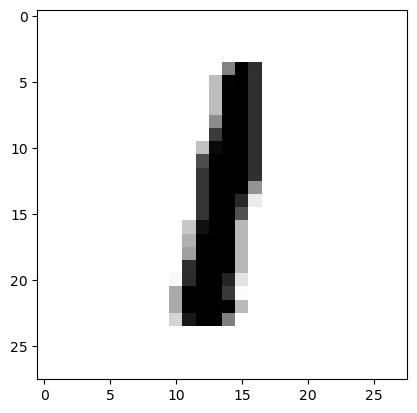

epoch:   0 | loss: 0.26043 | acc: 8.22  | acc_eval: 8.02  | loss_eval: 0.2603  | time: 0.00
epoch:   6 | loss: 0.00398 | acc: 93.24 | acc_eval: 93.13 | loss_eval: 0.00549 | time: 122.19
epoch:  12 | loss: 0.00333 | acc: 94.56 | acc_eval: 94.23 | loss_eval: 0.00459 | time: 127.09
epoch:  18 | loss: 0.00296 | acc: 94.91 | acc_eval: 94.34 | loss_eval: 0.00461 | time: 125.71
epoch:  24 | loss: 0.00261 | acc: 95.56 | acc_eval: 94.79 | loss_eval: 0.00425 | time: 128.64
epoch:  30 | loss: 0.00252 | acc: 95.68 | acc_eval: 94.81 | loss_eval: 0.00423 | time: 122.28
epoch:  36 | loss: 0.00238 | acc: 95.65 | acc_eval: 94.8  | loss_eval: 0.00421 | time: 123.56
epoch:  42 | loss: 0.00228 | acc: 96.08 | acc_eval: 95.16 | loss_eval: 0.00402 | time: 129.53
epoch:  48 | loss: 0.00223 | acc: 96.1  | acc_eval: 95.24 | loss_eval: 0.00403 | time: 128.22
epoch:  54 | loss: 0.00216 | acc: 96.39 | acc_eval: 95.63 | loss_eval: 0.00366 | time: 126.00
epoch:  60 | loss: 0.00207 | acc: 96.39 | acc_eval: 95.47 | lo

In [ ]:
from torchvision      import datasets
from matplotlib       import pyplot as plt

###############################################################
###################### play with me ###########################
###############################################################
# learning rate  #  batch size  #  nr epochs  #  sample rate  #
eta              ,     bs       ,   epochs    ,     sample   =\
0.17             ,     5        ,     100     ,      1.0      #
###############################################################

# mnist data
ds_train = datasets.MNIST (root="data", train=True,  download=True)
ds_test  = datasets.MNIST (root="data", train=False, download=True)
train    = Batches ( (ds_train.data.numpy(), ds_train.targets.numpy()), batchSize=bs, sample=sample )
evals    = Batches ( (ds_test. data.numpy(), ds_test. targets.numpy()) )

# show first image in first batch
plt.imshow (train.batches[0][0][0].reshape(28,28), cmap='binary')
plt.show()

# create model (version 4) and train the data
m = Model (Perceptrons(80,28*28), Perceptrons(40), Perceptrons(10)) 
m.  train (train, epochs, eta, evals)
pass

# x